In [44]:
from _tests import scripts
from scripts.notebook_utils import *
import shutil
from tqdm import tqdm
import pandas as pd

## Eyeriss architecture

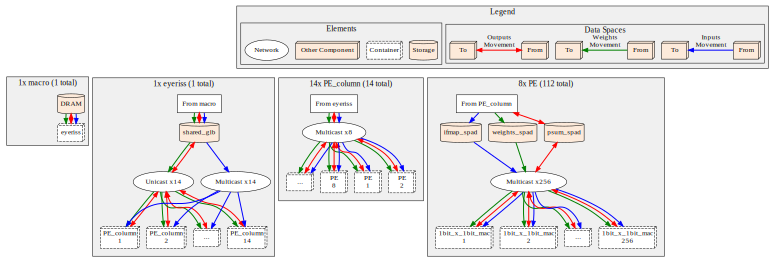

In [42]:
display_markdown("## Eyeriss architecture")
shutil.copyfile("arch_bs.yaml", "arch.yaml")
diag = display_diagram(get_diagram("nestquant", ignore=DIAGRAM_DEFAULT_IGNORE))

In [ ]:
archs = ["w0", "w3", "w3s", "w4"]
result = {}
for arch in archs:
    result = run_test("nestquant", "test_area_energy_breakdown", True, arch=arch, layer="workloads/llm/gemm.yaml")

## Quantizer after scratchpad

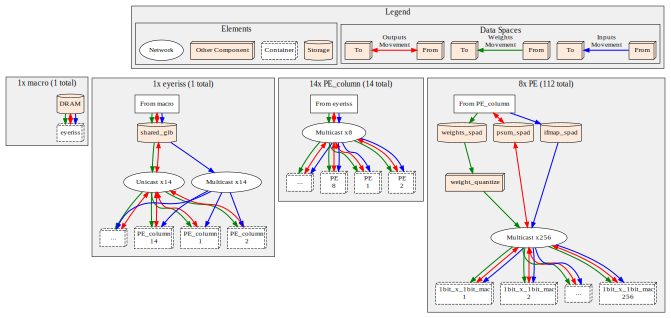

In [36]:
display_markdown("## Quantizer after scratchpad")
shutil.copyfile("arch_w0.yaml", "arch.yaml")
diag = display_diagram(get_diagram("nestquant", ignore=DIAGRAM_DEFAULT_IGNORE))

## Quantizer before PEs

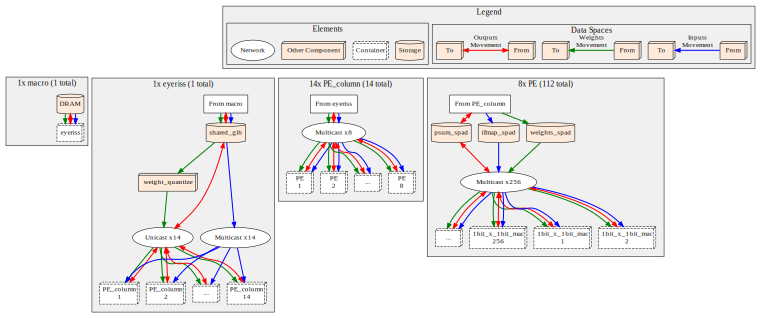

In [39]:
display_markdown("## Quantizer before PEs")
shutil.copyfile("arch_w3.yaml", "arch.yaml")
diag = display_diagram(get_diagram("nestquant", ignore=DIAGRAM_DEFAULT_IGNORE))

## Quantizer before PEs with split buffer

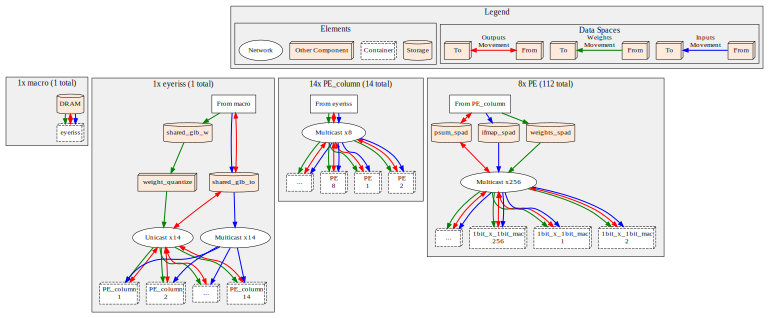

In [40]:
display_markdown("## Quantizer before PEs with split buffer")
shutil.copyfile("arch_w3s.yaml", "arch.yaml")
diag = display_diagram(get_diagram("nestquant", ignore=DIAGRAM_DEFAULT_IGNORE))

## Quantizer before buffer

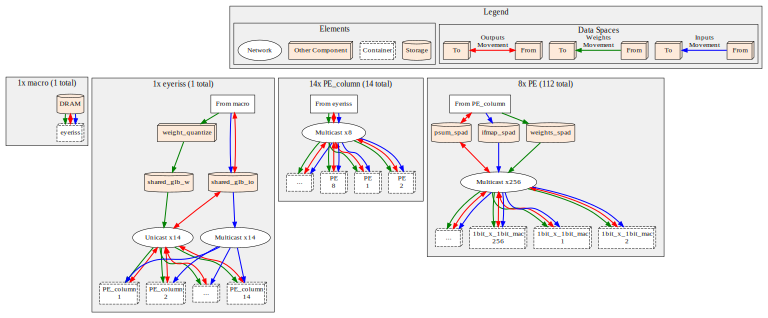

In [41]:
display_markdown("## Quantizer before buffer")
shutil.copyfile("arch_w4.yaml", "arch.yaml")
diag = display_diagram(get_diagram("nestquant", ignore=DIAGRAM_DEFAULT_IGNORE))

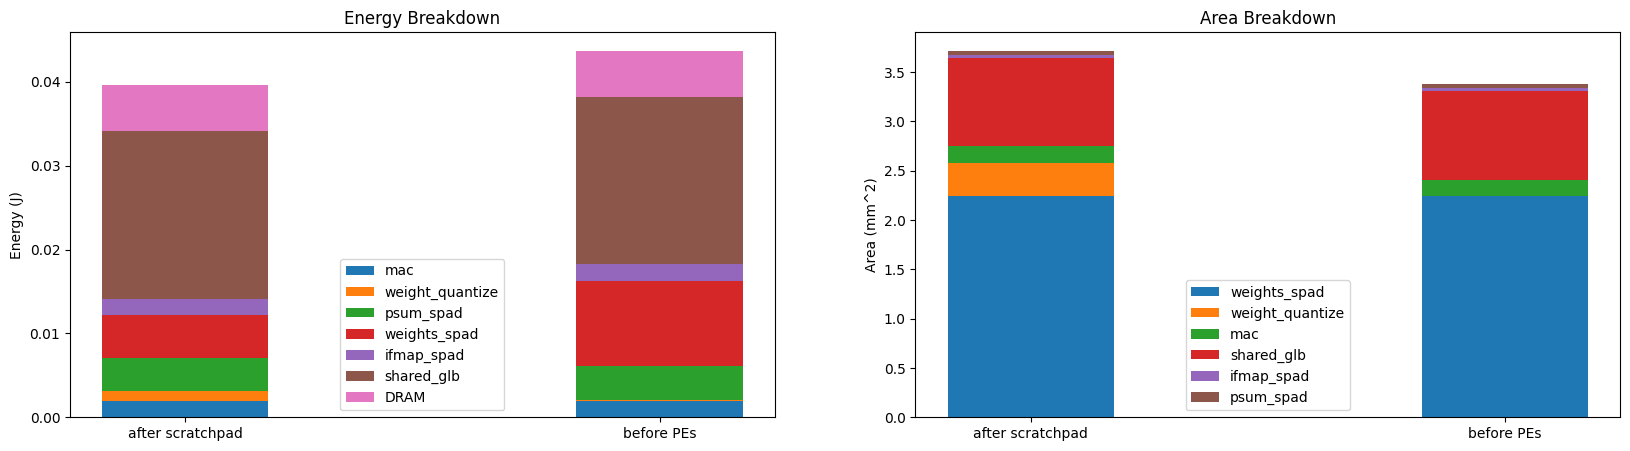

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
bar_stacked(
    {"after scratchpad": result["w0"].per_component_energy,
     "before PEs": result["w3"].per_component_energy},
    ylabel="Energy (J)",
    title=f"Energy Breakdown",
    ax=axs[0]
)
bar_stacked(
    {"after scratchpad": result["w0"].per_component_area * 1e6,
     "before PEs": result["w3"].per_component_area * 1e6},
    ylabel="Area (mm^2)",
    title=f"Area Breakdown",
    ax=axs[1]
)
for ax in axs:
    ax.tick_params(axis='x', labelrotation=0)
plt.savefig("figures/w03.pdf")

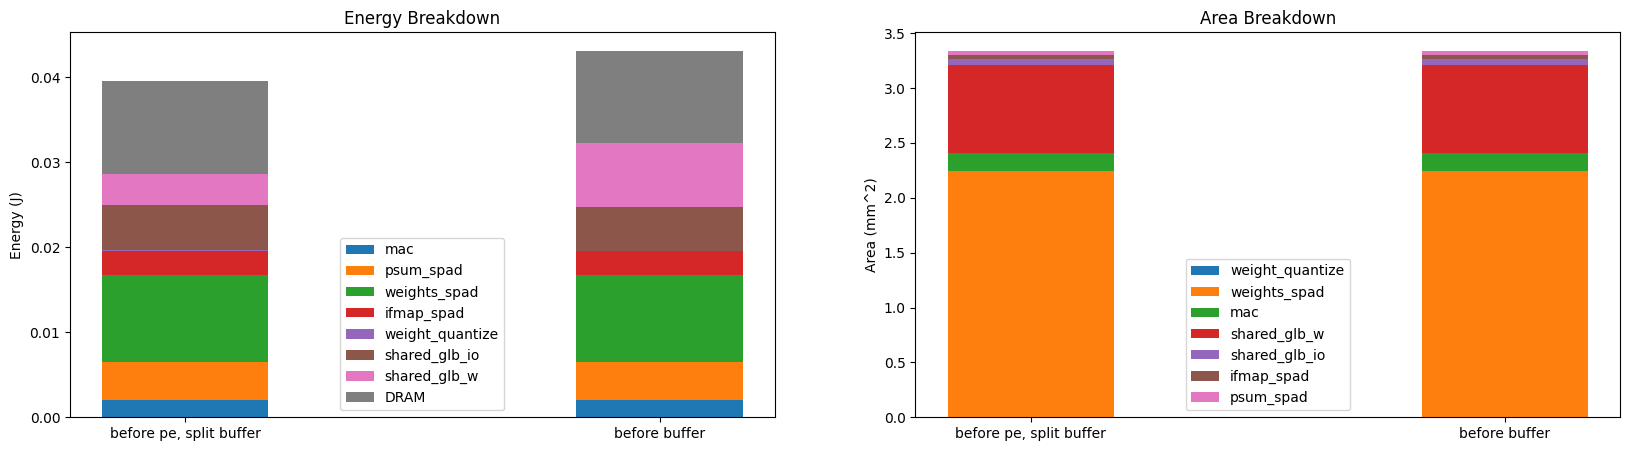

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
bar_stacked(
    {"before pe, split buffer": result["w3s"].per_component_energy,
     "before buffer": result["w4"].per_component_energy},
    ylabel="Energy (J)",
    title=f"Energy Breakdown",
    ax=axs[0]
)
bar_stacked(
    {"before pe, split buffer": result["w3s"].per_component_area * 1e6,
     "before buffer": result["w4"].per_component_area * 1e6},
    ylabel="Area (mm^2)",
    title=f"Area Breakdown",
    ax=axs[1]
)
for ax in axs:
    ax.tick_params(axis='x', labelrotation=0)
plt.savefig("figures/w34.pdf")